In [1]:
import pandas as pd
import tensorflow as tf
import sys

In [2]:
from meta.paths import PATH_TO_DATA, PATH_TO_TRAIN_PAIRS, PATH_TO_TRAIN
from preprocessing.data_generator import CustomGen
from text.title_similarity import calculate_title_similarities
from viz.image_printers import print_image_matrices, print_image_pair

# Import Training Data

In [3]:
train_df = pd.read_csv(PATH_TO_TRAIN_PAIRS)
train_df.head()

,class_label,source_image,target_image,type
0,1.0,0000a68812bc7e98c42888dfb1c07da0.jpg,0000a68812bc7e98c42888dfb1c07da0.jpg,RELATED
1,1.0,0000a68812bc7e98c42888dfb1c07da0.jpg,f83b49a86a0ee8592e3bf0204da3fbdf.jpg,RELATED
2,1.0,00039780dfc94d01db8676fe789ecd05.jpg,00039780dfc94d01db8676fe789ecd05.jpg,RELATED
3,1.0,00039780dfc94d01db8676fe789ecd05.jpg,8cbe4bf9706bc177fd61071ef776be8c.jpg,RELATED
4,1.0,000a190fdd715a2a36faed16e2c65df7.jpg,000a190fdd715a2a36faed16e2c65df7.jpg,RELATED


# Test Generator

In [4]:
data_generator = CustomGen(train_df)

Found 163768 validated image filenames belonging to 2 classes.
Found 163768 validated image filenames belonging to 2 classes.


1.0


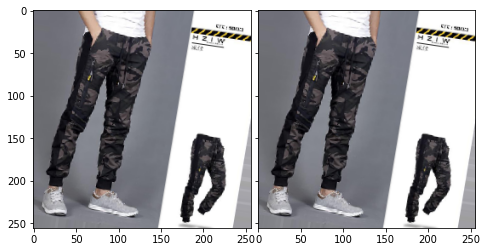

In [7]:
target_index = 1
batch_index = 300
[source_images, target_images], class_labels = data_generator[batch_index]
print(class_labels[target_index])
print_image_matrices((source_images[target_index], target_images[target_index]))

1.0


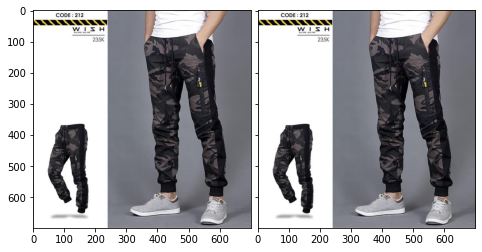

In [8]:
entry = train_df.iloc[batch_index * 32 + target_index]
print(entry['class_label'])
print_image_pair((entry["source_image"], entry["target_image"]))

# How to Use Generator

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from random import randrange
from viz.image_printers import print_image_type, print_titles

data_generator = CustomGen(train_df) # Step 1. initialize it

Found 163768 validated image filenames belonging to 2 classes.
Found 163768 validated image filenames belonging to 2 classes.


## Related Products

('LAMPU SEN LED MOGE DRL DAN SEIN ICC I lampu sen led 2 warna SKU-0629',
 'LAMPU SEN LED MOGE DRL DAN SEIN SEPASANG I lampu sen led 2 warna I lampu led sen motor SKU-0629')

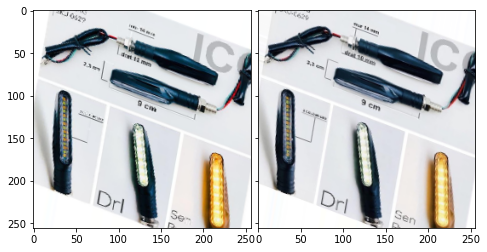

In [10]:
related_indices = print_image_type(train_df, data_generator, "RELATED")
print_titles(train_df, related_indices)

## Unrelated but Similar Products

('Pensil 2B Staedler / Pensil Ujian Berkuwalitas / TM-69',
 'IMPLORA BARU - IMPLORA CHEEKLIT & LIP TINT')

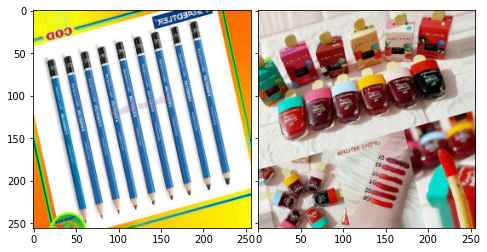

In [11]:
unrelated_similar_indices = print_image_type(train_df, data_generator, "UNRELATED_SIMILAR")
print_titles(train_df, unrelated_similar_indices)

## Unrelateted and Distinct Products

('Original Sandal Swallow MODERN Classic 05 D Color Collection. Uk 9.5 - 12 (Jumbo Size)',
 'Paper Bag Victoria Secret')

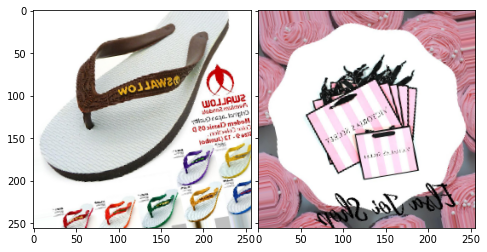

In [12]:
unrelated_notsimilar_indices = print_image_type(train_df, data_generator, "UNRELATED_NOTSIMILAR")
print_titles(train_df, unrelated_notsimilar_indices)